Credit to [this notebook](https://www.kaggle.com/code/tarundirector/rainfall-pred-eda-clean-ai-news#%5B3%5D-%F0%9F%92%A1-Exploratory-Data-Analysis-(EDA)) for Data Cleaning and Exploratory Data Analysis

# Rainfall Data | Exploratory Data Analysis and Binary Prediction Model
Business Task: Use the rainfall dataset to predict rainfall for each day of the year

Evaluation Metric: Models are evaluated on Area Under the Receiver Operating Characteristic Curve (AUC-ROC) between the predicted probability and the observed target.
- AUC = 1.0 → Perfect classification.
- AUC > 0.90 → Excellent model.
- AUC = 0.50 → Random guessing.
- AUC < 0.50 → Worse than random.

AUC-ROC is used over other likelihood evaluation methods because it doesn't depend on a probability threshold, and remains reliable even when one of the events are rare (e.x. rainfall)

# Dataset Overview
## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
data_train = pd.read_csv('./train.csv', index_col='id')
data_test = pd.read_csv('./test.csv', index_col='id')

## Dataset Summary
### Training Data

In [3]:
print('Display first five rows and general info')
display(data_train.head(), data_train.info(), data_train.describe())

Display first five rows and general info
<class 'pandas.core.frame.DataFrame'>
Index: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 222.4 KB


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


None

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


# Data Cleaning and Preparation
## Check for null values

In [4]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


No null values in training data, one missing value in test data. Will have to be imputed.
## Remove extra whitespace on columns (if there is any)
(Note, this was needed for the original data which this dataset was based on, not needed for this one.)

## Data Preprocessing
First, impute the missing data in test

In [5]:
data_test['winddirection'].fillna(data_test['winddirection'].median(), inplace=True)

data_train.columns = data_train.columns.str.strip()
data_test.columns = data_test.columns.str.strip()

## Fix typos

In [6]:
# TODO check for duplicates
data_train.rename(columns={'temparature': 'temp'}, inplace=True)
data_test.rename(columns={'temparature': 'temp'}, inplace=True)

# Exploratory Data Analysis
## Dataset Observations:
### Dataset Shape
- Training Data: 2190 rows, 13 columns
- Test Data: 730 rows, 12 columns (Missing rainfall, which will be modeled)
### Missing Values
- No missing values in training dataset
- `winddirection` feature has one missing value (will be imputed)
### Key Data Observations
- ID: Used as index column
- Day: 1-365, days of the year
- Pressure: Ranges from 999 to 1034.6 hPa.(hPa = Hectopascal. The standard pressure at sea-level is 1013.25 hPa)
- Temperature Features: Max temp (10.4°C - 36.0°C), Min temp (4.0°C - 29.8°C), and Average temp for the day.
- Dew Point: Ranges from -0.3°C to 26.7°C. (dew point is the temperature point at which the air can hold no more water vapor and is one of the factors in the heat index. A dew point of between 10°C to 15°C is most comfortable, higher becomes uncomfortable due to the air's inability to hold more water (i.e. sweat)
- Humidity: Ranges from 39% to 98%.(The amount of water vapor in the air)
- Cloud Cover: Ranges from 2% to 100%.
- Sunshine Duration: Ranges from 0 to 12.1 hours.
- Wind Speed: Ranges from 4.4 km/h to 59.5 km/h.
- Wind Direction: Further investigation required. Most values are whole numbers, multiples of ten, but some do not adhere to this trend. Ranges from 10 to 300.
- Rainfall: Binary target variable (0 = No Rain, 1 = Rain).
### Summary Stats
- Pressure: Mean: 1013.6 hPa, Min: 999.0, Max: 1034.6.
- Max Temperature: Mean: 26.36°C, Min: 10.4°C, Max: 36.0°C.
- Min Temperature: Mean: 22.17°C, Min: 4.0°C, Max: 29.8°C.
- Dew Point: Mean: 20.45°C, Min: -0.3°C, Max: 26.7°C.
- Humidity: Mean: 82.03%, Min: 39%, Max: 98%.
- Cloud Cover: Mean: 75.72%, Min: 2%, Max: 100%.
- Sunshine: Mean: 3.74 hours, Min: 0 hours, Max: 12.1 hours.
- Wind Speed: Mean: 21.8 km/h, Min: 4.4 km/h, Max: 59.5 km/h.
- Rainfall: Mean: 0.75, indicating ~75% rainy days in the dataset.

### Key Takeaways
- High variance in cloud cover and humidity suggests their importance in predicting rainfall.
- Rainfall distribution is imbalanced (~75% rainy days), which should be considered in modeling.

## Numerical Feature Analysis

In [7]:
numerical_variables = ['pressure', 'maxtemp', 'temp', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection','windspeed']
target_variable = 'rainfall'

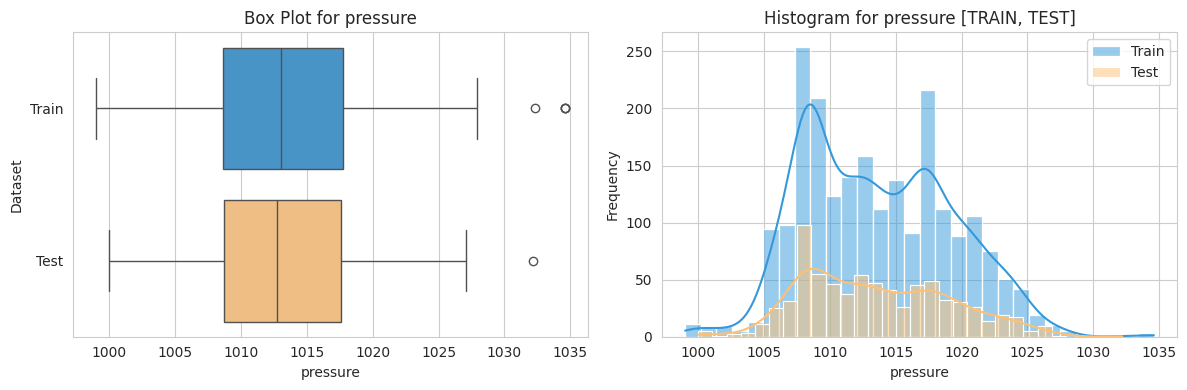

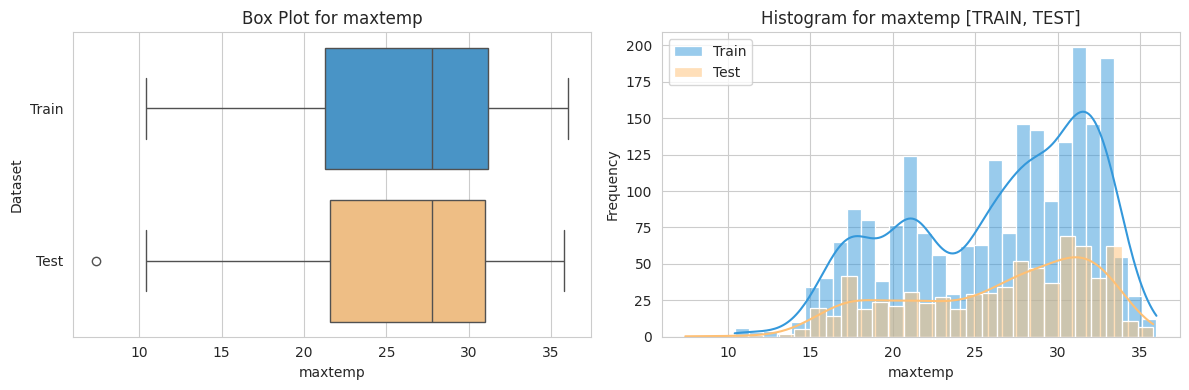

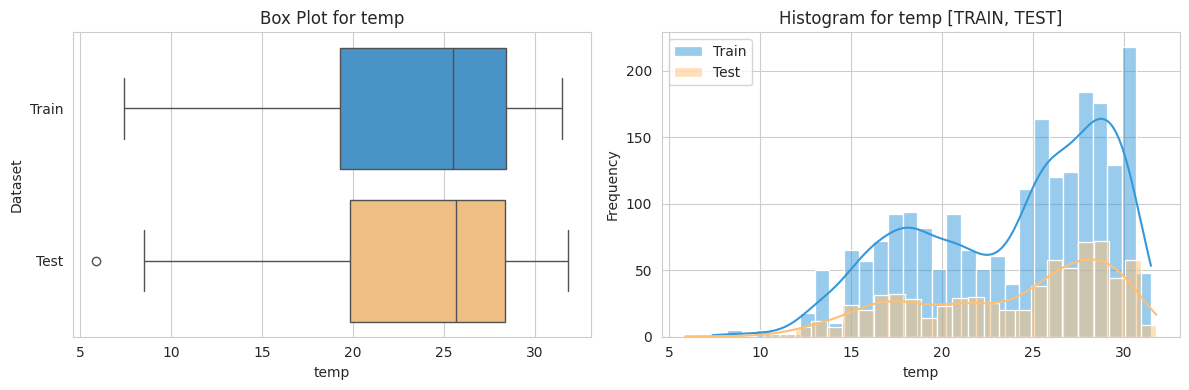

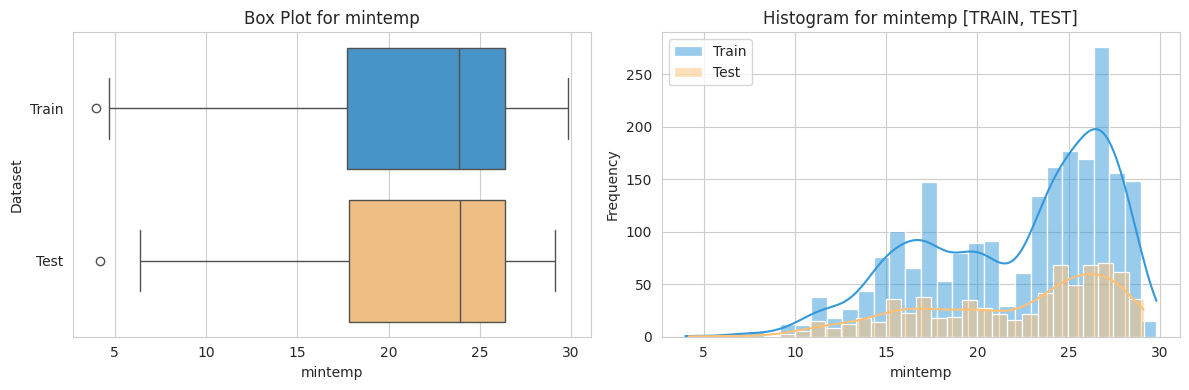

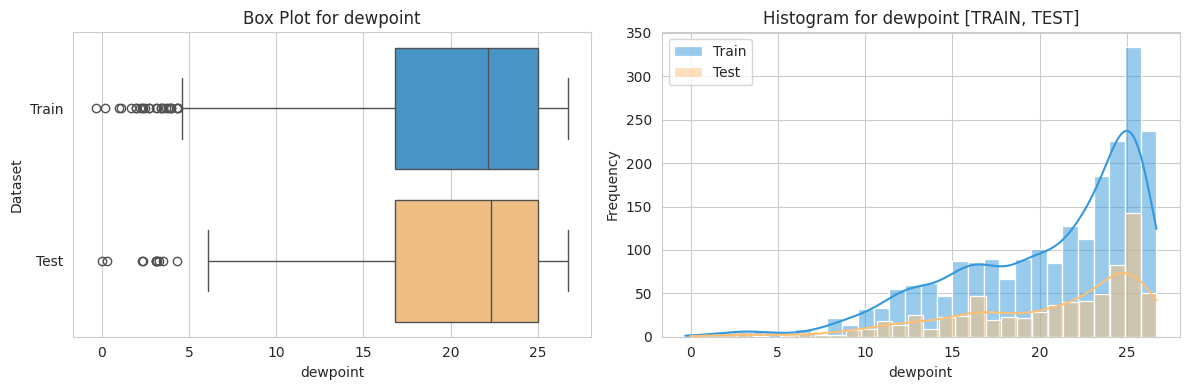

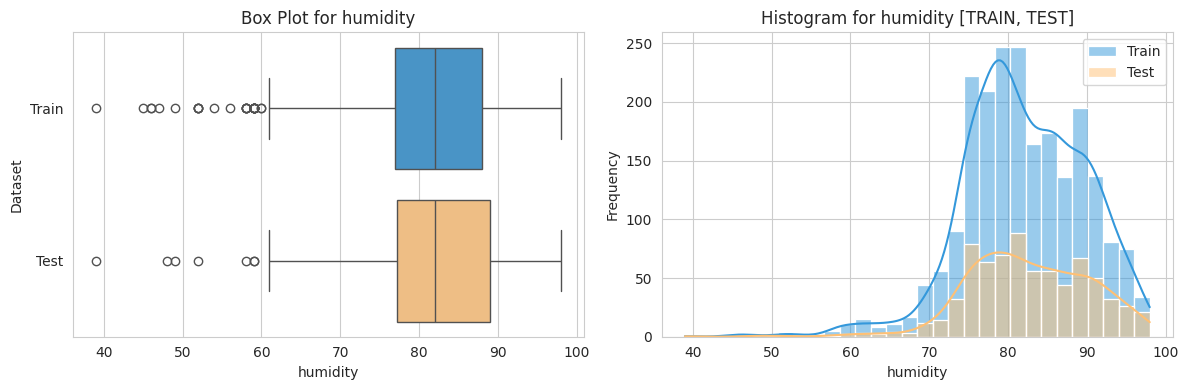

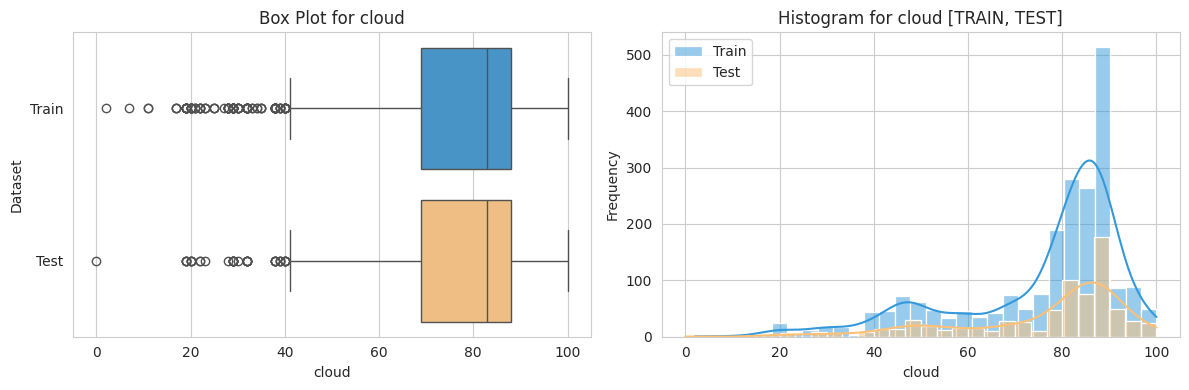

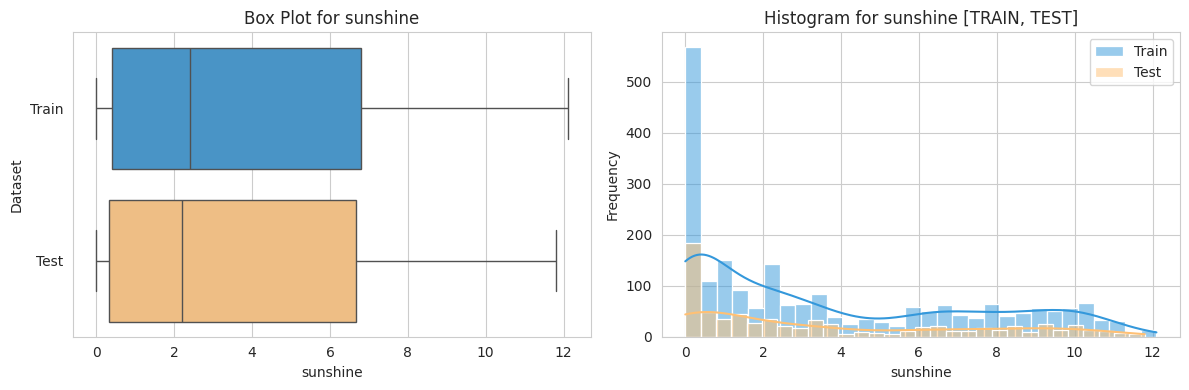

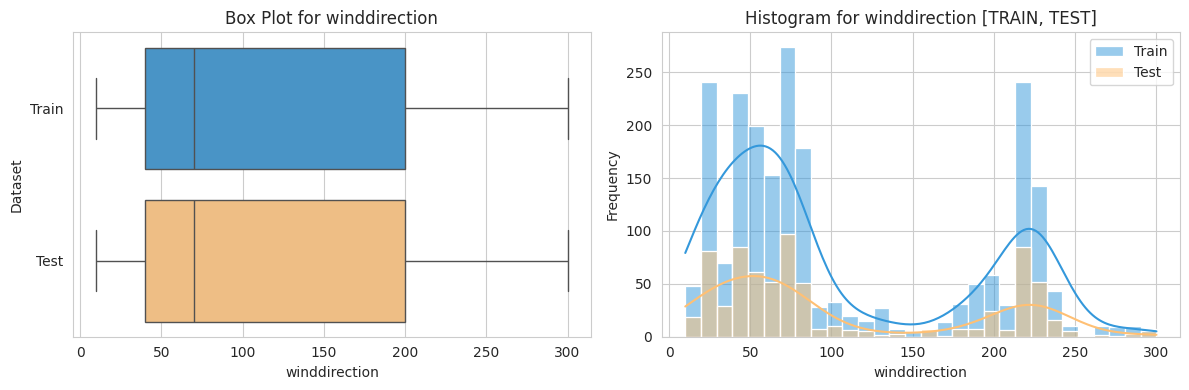

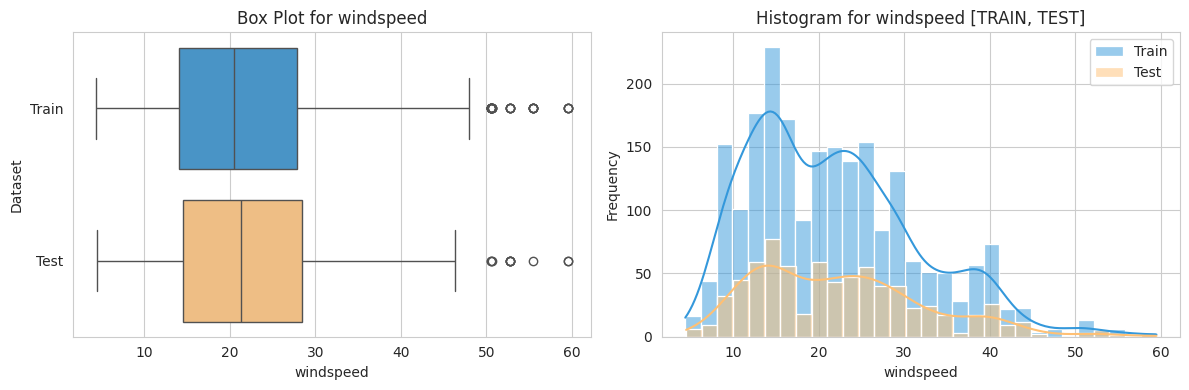

In [8]:
# TODO understand each line of code by adding a comment
custom_palette = ['#3498db', '#ffc074']

data_train['Dataset'] = 'Train'
data_test['Dataset'] = 'Test'


variables = [col for col in data_train.columns if col in numerical_variables]

def create_variable_plots(variable):
    sns.set_style('whitegrid')

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=pd.concat([data_train, data_test]), x=variable, y="Dataset", palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")

    # Separate Histograms
    plt.subplot(1, 2, 2)
    sns.histplot(data=data_train, x=variable, color = custom_palette[0], kde=True, bins=30, label="Train")
    sns.histplot(data=data_test, x=variable, color = custom_palette[1], kde=True, bins=30, label="Test")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN, TEST]")
    plt.legend()

    # Adjust spacing between layouts
    plt.tight_layout()

    plt.show()

for variable in variables:
    create_variable_plots(variable)

data_train.drop('Dataset', axis=1, inplace=True)
data_test.drop('Dataset', axis=1, inplace=True)

## Bivariate Analysis
Next, we'll measure the correlation between each independent variable/feature. This is done to see if there is significant overlap between features.

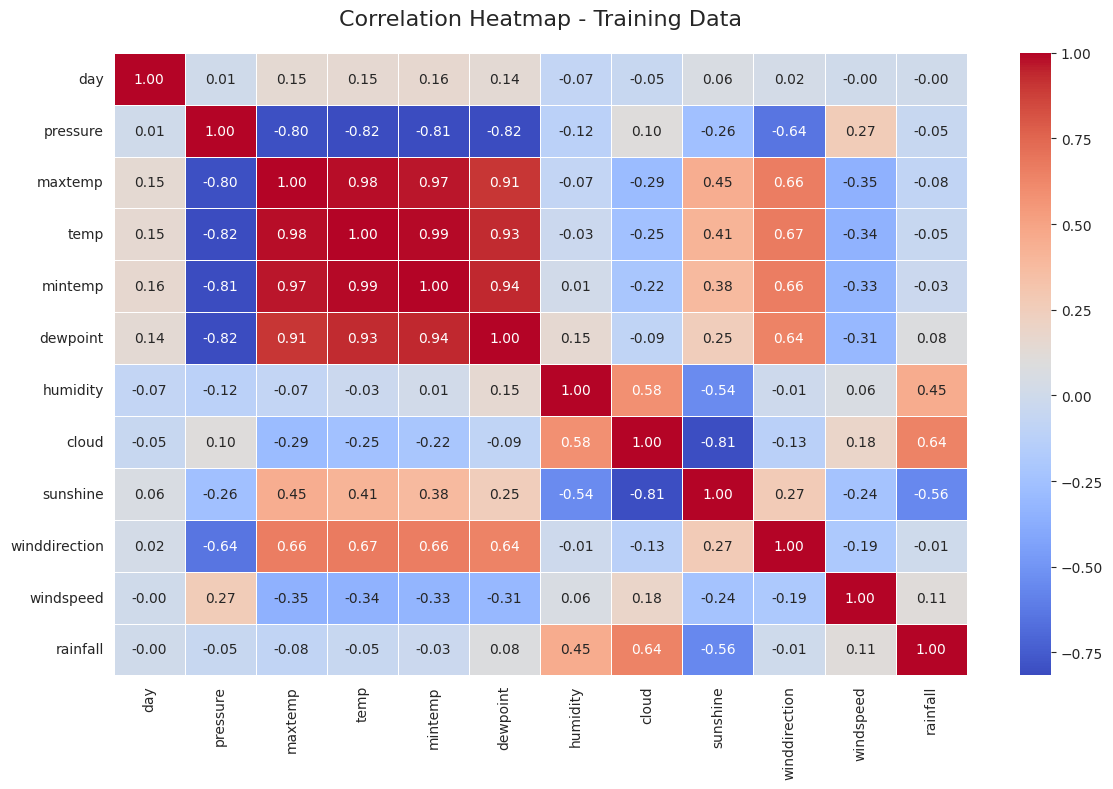

In [9]:
data_corr = data_train.corr()

# Create a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, cmap='coolwarm', linewidths=.5, annot=True, fmt=".2f")

# Add title
plt.title("Correlation Heatmap - Training Data", fontsize=16, pad=20)

# Adjust layout and display
plt.tight_layout()
plt.show()

### Key Insights
1. `maxtemp`, `temperature`, and `mintemp` are highly correlated (~.97 to .99)
   - Consider feature selection/PCA to reduce dimensionality
2. `dewpoint` and `humidity` are positively correlated (~.68 to .69)
3. `cloud` and `sunshine` are negatively correlated (~-.65 to .66)
4. `pressure` and `humidity` are moderately negatively correlated (~-0.29 to -0.30)
5. `windspeed` and `cloud` are weakly negatively correlated (~-0.19 to -0.24)
6. `temperature` and `humidity` are weakly positively correlation (~0.15).
7. `winddirection` and `windspeed` are moderately positively correlation (~0.19 to 0.21).

In [10]:
rainfall_corr = data_corr['rainfall'][data_corr['rainfall'].abs().sort_values(ascending=False).index]

print("Strongest correlations for rainfall")
print(rainfall_corr)

Strongest correlations for rainfall
rainfall         1.000000
cloud            0.641191
sunshine        -0.555287
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
maxtemp         -0.079304
pressure        -0.049886
temp            -0.049660
mintemp         -0.026841
winddirection   -0.006939
day             -0.000462
Name: rainfall, dtype: float64


In [11]:
# Let's create some features
# Interaction features
data_train['tempRange'] = data_train['maxtemp'] - data_train['mintemp']

data_train['dewpointDiff'] = data_train['dewpoint'] - data_train['temp']

data_train['humidTempRatio'] = data_train['humidity'] / data_train['temp']

# Time based feature
data_train['season'] = pd.cut(data_train['day'], bins=[0, 60, 150, 240, 330, 365], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], include_lowest=True, ordered=False)

data_train['cardinalWD'] = pd.cut(data_train['winddirection'], bins=[0, 45, 135, 225, 315, 360], labels=['North', 'East', 'South', 'West', 'North'], include_lowest=True, ordered=False)

data_train['dewHumidInteraction'] = data_train['dewpoint'] * data_train['humidity']

In [12]:
new_corr = pd.get_dummies(data_train).corr()
new_rainfall_corr = new_corr['rainfall'][new_corr['rainfall'].abs().sort_values(ascending=False).index]

# 3 new impactful features, not bad
print("Strongest correlations for rainfall")
print(new_rainfall_corr)

Strongest correlations for rainfall
rainfall               1.000000
cloud                  0.641191
sunshine              -0.555287
humidity               0.454213
dewpointDiff           0.361590
dewHumidInteraction    0.217247
tempRange             -0.204957
humidTempRatio         0.178938
windspeed              0.111625
season_Spring          0.100032
season_Summer         -0.082714
dewpoint               0.081965
maxtemp               -0.079304
cardinalWD_East        0.076280
cardinalWD_North      -0.056784
pressure              -0.049886
temp                  -0.049660
mintemp               -0.026841
cardinalWD_West       -0.025933
season_Winter         -0.014974
cardinalWD_South      -0.011255
winddirection         -0.006939
season_Fall           -0.003227
day                   -0.000462
Name: rainfall, dtype: float64


## Creating the Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X = data_train.drop('rainfall', axis=1)
y = data_train['rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categoric_cols = X.select_dtypes(include=['object', 'category']).columns
print(categoric_cols)

Index(['season', 'cardinalWD'], dtype='object')


In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_cols),
        ('cat', categoric_transformer, categoric_cols)
    ])

### Grid Search Fun!

In [15]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Logistic Regression

param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10], # Regularization Strength
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300]
}
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))])

grid_search_lr = GridSearchCV(my_pipeline, param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression", grid_search_lr.best_params_)

Best parameters for Logistic Regression {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}


In [17]:
'''
# LinearSVC

param_grid_svc = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10], # Regularization Strength
    'classifier__max_iter': [1000, 2000, 3000],
    'classifier__loss': ['hinge', 'squared_hinge']
}

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(random_state=0))])

grid_search_svc = GridSearchCV(my_pipeline, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

print("Best parameters for LinearSVC:", grid_search_svc.best_params_)
'''

'\n# LinearSVC\n\nparam_grid_svc = {\n    \'classifier__C\': [0.001, 0.01, 0.1, 1, 10], # Regularization Strength\n    \'classifier__max_iter\': [1000, 2000, 3000],\n    \'classifier__loss\': [\'hinge\', \'squared_hinge\']\n}\n\nmy_pipeline = Pipeline(steps=[\n    (\'preprocessor\', preprocessor),\n    (\'classifier\', LinearSVC(random_state=0))])\n\ngrid_search_svc = GridSearchCV(my_pipeline, param_grid_svc, cv=5, scoring=\'accuracy\')\ngrid_search_svc.fit(X_train, y_train)\n\nprint("Best parameters for LinearSVC:", grid_search_svc.best_params_)\n'

In [18]:
'''
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Classifier
param_dist_rf = {
    'classifier__n_estimators': np.arange(100, 1001, 100),
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))])

random_search_rf = RandomizedSearchCV(my_pipeline, param_dist_rf,
                                    n_iter=100,
                                    cv=5, 
                                    scoring='roc_auc',
                                    #verbose=2,
                                    n_jobs=-1,
                                    random_state=0)

random_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", random_search_rf.best_params_)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Random Forest Classifier\nparam_dist_rf = {\n    \'classifier__n_estimators\': np.arange(100, 1001, 100),\n    \'classifier__max_depth\': [None, 10, 20, 30, 40, 50],\n    \'classifier__min_samples_split\': [2, 5, 10],\n    \'classifier__min_samples_leaf\': [1, 2, 4],\n    \'classifier__max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'classifier__bootstrap\': [True, False]\n}\n\nmy_pipeline = Pipeline(steps=[\n    (\'preprocessor\', preprocessor),\n    (\'classifier\', RandomForestClassifier(random_state=0))])\n\nrandom_search_rf = RandomizedSearchCV(my_pipeline, param_dist_rf,\n                                    n_iter=100,\n                                    cv=5, \n                                    scoring=\'roc_auc\',\n                                    #verbose=2,\n                                    n_jobs=-1,\n                                    random_state=0)\n\nrandom_search_rf.fit(X_train, y_train)\npri

In [19]:
'''
# XGBClassifier

param_dist_xgb = {
    'classifier__n_estimators': np.arange(100, 1001, 100),
    'classifier__learning_rate': [.01, .05, .1],
    'classifier__max_depth': [3, 6, 10, 15],
    'classifier__subsample': [.8, .9, 1],
    'classifier__colsample_bytree': [.7, .8, 1],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__reg_alpha': [0, 0.1, .5, 1],
    'classifier__reg_lambda': [0, 0.1, .5, 1]
}

my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=0))])

random_search_xgb = RandomizedSearchCV(my_pipeline, param_dist_xgb, 
                                    n_iter=100,
                                    cv=5, 
                                    scoring='roc_auc',
                                    #verbose=2,
                                    n_jobs= -1,
                                    random_state=0)
                                
random_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBClassifier:", random_search_xgb.best_params_)
'''

'\n# XGBClassifier\n\nparam_dist_xgb = {\n    \'classifier__n_estimators\': np.arange(100, 1001, 100),\n    \'classifier__learning_rate\': [.01, .05, .1],\n    \'classifier__max_depth\': [3, 6, 10, 15],\n    \'classifier__subsample\': [.8, .9, 1],\n    \'classifier__colsample_bytree\': [.7, .8, 1],\n    \'classifier__gamma\': [0, 0.1, 0.2],\n    \'classifier__reg_alpha\': [0, 0.1, .5, 1],\n    \'classifier__reg_lambda\': [0, 0.1, .5, 1]\n}\n\nmy_pipeline = Pipeline(steps=[\n    (\'preprocessor\', preprocessor),\n    (\'classifier\', XGBClassifier(random_state=0))])\n\nrandom_search_xgb = RandomizedSearchCV(my_pipeline, param_dist_xgb, \n                                    n_iter=100,\n                                    cv=5, \n                                    scoring=\'roc_auc\',\n                                    #verbose=2,\n                                    n_jobs= -1,\n                                    random_state=0)\n                                \nrandom_search_xgb.f

In [35]:
def display_evaluation(model):
    # Get Predictions
    preds = model.predict(X_test)

    # Get Auc-roc if it has it
    if hasattr(model, "predict_proba"):  # Not all models have predict_proba
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"AUC-ROC: {roc_auc:.4f}")

    # Classification report
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, preds))

In [36]:
#Test the models with optimal hyperparameters
models = {
    "Logistic Regression": grid_search_lr.best_estimator_,
    #"LinearSVC": grid_search_svc.best_estimator_,
    #"Random Forest": random_search_rf.best_estimator_,
    #"XGBClassifier": random_search_xgb.best_estimator_,
}

for name, model in models.items():
    # Annoying error; Even though they were fit when tuning hyperparameters, my whiny models wanted to be tuned again
    # So be it!!
    model.fit(X_train, y_train)
    print(f"Training model: {name}\n" + "-"*30)
    display_evaluation(model)

Training model: Logistic Regression
------------------------------
AUC-ROC: 0.8966
Accuracy: 0.8699
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       116
           1       0.89      0.94      0.91       322

    accuracy                           0.87       438
   macro avg       0.84      0.81      0.82       438
weighted avg       0.87      0.87      0.87       438



## Model Evaluation

In [37]:
best_model = models["Logistic Regression"]

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')

print(scores)

[0.87575758 0.91097082 0.90294613 0.89927048 0.87797419]


In [39]:
print("%0.2f roc-auc average with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.01


In [23]:
# Check Feature Importance

# Get the feature names (after one-hot encoding) from the ColumnTransformer
ohe = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['one-hot']
encoded_columns = ohe.get_feature_names_out(input_features=categoric_cols)

# Combine the numeric columns with the encoded columns to get all feature names
all_columns = np.concatenate([numeric_cols, encoded_columns])

coef = best_model.named_steps['classifier'].coef_[0]
feature_importance = pd.DataFrame({'Feature': all_columns, 'Importance': coef})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                Feature  Importance
7                 cloud    0.705254
19      cardinalWD_East    0.268408
17        season_Summer    0.237844
6              humidity    0.216663
20     cardinalWD_North    0.202315
15          season_Fall    0.189328
21     cardinalWD_South    0.189188
16        season_Spring    0.187447
12         dewpointDiff    0.176689
14  dewHumidInteraction    0.159218
18        season_Winter    0.143731
22      cardinalWD_West    0.098438
10            windspeed    0.091266
5              dewpoint    0.078820
9         winddirection    0.066349
13       humidTempRatio    0.057651
3                  temp    0.014688
4               mintemp    0.007263
2               maxtemp    0.004958
0                   day    0.000776
11            tempRange   -0.005682
1              pressure   -0.083422
8              sunshine   -0.418564


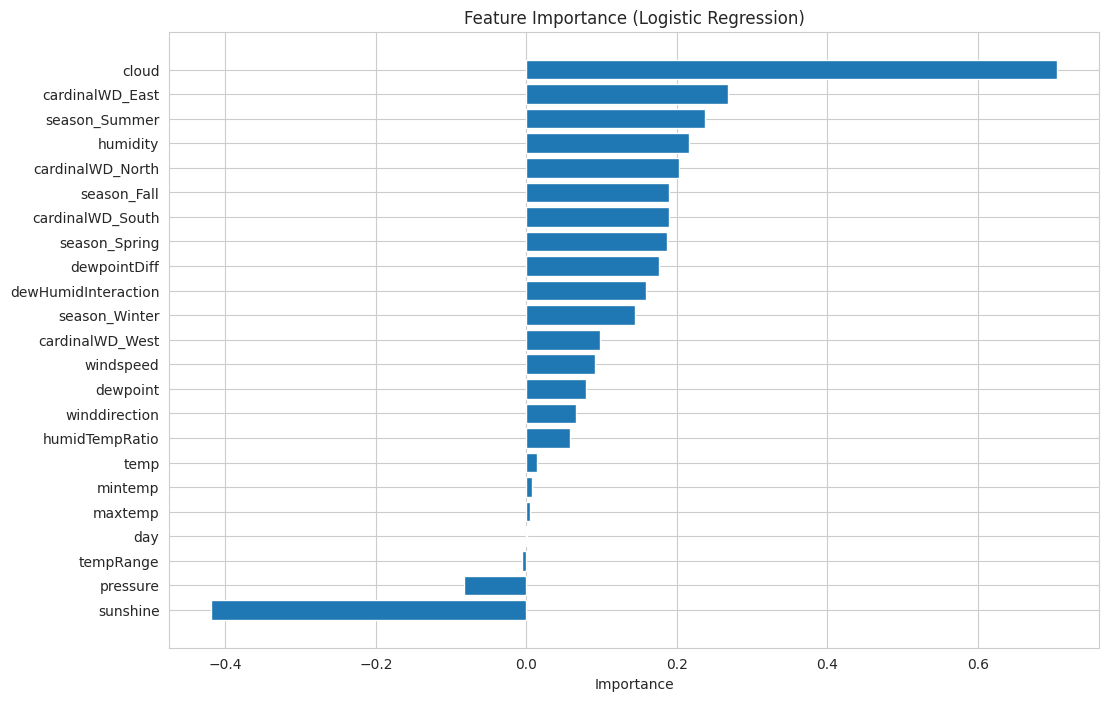

In [24]:
# Visualize Feature Importance

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.show()

In [25]:
# Train the model on ALL the data
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['day', 'pressure', 'maxtemp', 'temp', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'tempRange',
       'dewpointDiff', 'humidTempRatio', 'dewHumidInteraction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['season', 'cardinalWD'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=0.01, random_state=0,
                                    solver='liblinear'))])

## Submission

In [27]:
# If I wasn't lazy, I'd make a function. Woe to future me!
# Let's create some features
# Interaction features
data_test['tempRange'] = data_test['maxtemp'] - data_test['mintemp']

data_test['dewpointDiff'] = data_test['dewpoint'] - data_test['temp']

data_test['humidTempRatio'] = data_test['humidity'] / data_test['temp']

# Time based feature
data_test['season'] = pd.cut(data_test['day'], bins=[0, 60, 150, 240, 330, 365], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], include_lowest=True, ordered=False)

data_test['cardinalWD'] = pd.cut(data_test['winddirection'], bins=[0, 45, 135, 225, 315, 360], labels=['North', 'East', 'South', 'West', 'North'], include_lowest=True, ordered=False)

data_test['dewHumidInteraction'] = data_test['dewpoint'] * data_train['humidity']

In [28]:
predictions = best_model.predict(data_test)
submission = pd.DataFrame({'id': data_test.index, 'rainfall': predictions})
submission.to_csv('submission.csv', index=False)
display(submission)

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1
